In [4]:
import pandas as pd
from hugging_face import hf_analysis
from sklearn.metrics import classification_report

WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.1.0+cu121 with CUDA 1201 (you have 2.1.0+cpu)
    Python  3.10.11 (you have 3.10.7)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


In [5]:
file_path = 'testes/data.jsonl'

# Ler o arquivo removendo linhas de comentário
with open(file_path, 'r') as file:
    lines = file.readlines()
    # Remover linhas que começam com "//" (assumindo que são comentários)
    jsonl_lines = [line for line in lines if not line.strip().startswith('//')]

# Criar DataFrame a partir do conteúdo sem comentários
df = pd.read_json('\n'.join(jsonl_lines), lines=True)

# Exibir o DataFrame
print(df)


                                                     text  label
0       i feel awful about it too because it s my job ...      0
1                                   im alone i feel awful      0
2       ive probably mentioned this before but i reall...      1
3                i was feeling a little low few days back      0
4       i beleive that i am much more sensitive to oth...      2
...                                                   ...    ...
416804  that was what i felt when i was finally accept...      1
416805  i take every day as it comes i m just focussin...      4
416806      i just suddenly feel that everything was fake      0
416807  im feeling more eager than ever to claw back w...      1
416808  i give you plenty of attention even when i fee...      0

[416809 rows x 2 columns]


0 Sadness
1 joy
2 Love
3 anger
4 fear
5 suprise

In [6]:
df_filtro_5 = df[df['label'] == 5].head(200)
df_filtro_4 = df[df['label'] == 4].head(200)
df_filtro_3 = df[df['label'] == 3].head(200)
df_filtro_2 = df[df['label'] == 2].head(200)
df_filtro_1 = df[df['label'] == 1].head(200)
df_filtro_0 = df[df['label'] == 0].head(200)

df_resultante = pd.concat([df_filtro_0, df_filtro_1, df_filtro_2, df_filtro_3, df_filtro_4, df_filtro_5])
df_resultante = df_resultante.reset_index(drop=True)
print(df_resultante)

                                                   text  label
0     i feel awful about it too because it s my job ...      0
1                                 im alone i feel awful      0
2              i was feeling a little low few days back      0
3     i also feel disillusioned that someone who cla...      0
4     i wish you knew every word i write i write for...      0
...                                                 ...    ...
1195      i am feeling so overwhelmed with thankfulness      5
1196  i remember feeling a bit stunned when we recei...      5
1197  i tried to feel something be impressed and amazed      5
1198  i feel shocked dancing on screen ileana width ...      5
1199  i was going down the shaky elevator into the n...      5

[1200 rows x 2 columns]


In [13]:
comments = df_resultante['text'].tolist()
real = df_resultante['label'].tolist()

In [14]:
predict = hf_analysis(comments,'en')

In [16]:
real = ['tristeza' if x == 0 else x for x in real]
real = ['alegria' if x == 1 else x for x in real]
real = ['amor' if x == 2 else x for x in real]
real = ['raiva' if x == 3 else x for x in real]
real = ['medo' if x == 4 else x for x in real]
real = ['surpresa' if x == 5 else x for x in real]

print(real)



predict = ['tristeza' if x == 'sadness' else x for x in predict]
predict = ['alegria' if x == 'joy' else x for x in predict]
predict = ['amor' if x == 'love' else x for x in predict]
predict = ['raiva' if x == 'anger' else x for x in predict]
predict = ['medo' if x == 'fear' else x for x in predict]
predict = ['surpresa' if x == 'surprise' else x for x in predict]



['tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tristeza', 'tr

In [17]:
print(classification_report(real, predict, labels=['tristeza', 'alegria', 'amor', 'raiva','medo', 'surpresa']))


              precision    recall  f1-score   support

    tristeza       0.91      0.91      0.91       200
     alegria       0.70      0.82      0.76       200
        amor       0.81      0.72      0.76       200
       raiva       0.87      0.86      0.87       200
        medo       0.77      0.89      0.83       200
    surpresa       0.92      0.73      0.82       200

    accuracy                           0.82      1200
   macro avg       0.83      0.82      0.82      1200
weighted avg       0.83      0.82      0.82      1200



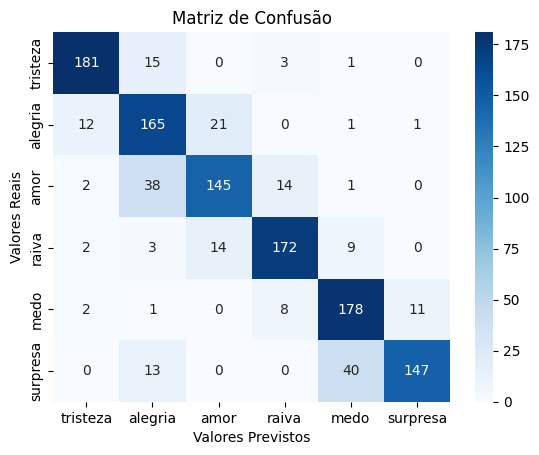

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# confusion matrix
labels = ['tristeza', 'alegria', 'amor', 'raiva','medo', 'surpresa']
matriz_confusao = np.zeros((len(labels), len(labels)), dtype=int)

# fill in the confusion matrix
for p, r in zip(predict, real):
    matriz_confusao[labels.index(r), labels.index(p)] += 1

# create heatmap
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# add label
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')

# Exibir o mapa de calor
plt.show()
